### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# 1. Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [392]:
# Import as the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [393]:
# Load the CSV file(s) as reviews.
# Import the data set.
turtle_reviews = pd.read_csv('turtle_reviews.csv')
turtle_sales = pd.read_csv('turtle_sales.csv')

# View the DataFrame of Turtle Reviews

# View the no. of rows and columns.
print(turtle_reviews.shape)

# View the data types.
print(turtle_reviews.dtypes)

# View the list of columns.
print(turtle_reviews.columns)

# View the top 5 records.
turtle_reviews.head()

# View the DataFrame of Turtle Sales

# View the no. of rows and columns.
print(turtle_sales.shape)

# View the data types.
print(turtle_sales.dtypes)

# View the list of columns.
print(turtle_sales.columns)

# View the top 5 records.
turtle_sales.head()

(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


(352, 9)
Ranking           int64
Product           int64
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
Global_Sales    float64
dtype: object
Index(['Ranking', 'Product', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'Global_Sales'],
      dtype='object')


,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72


In [394]:
# Any missing values?
# Replace the missing values with 0.
turtle_reviews.fillna(0, inplace=True)
turtle_sales.fillna(0, inplace=True)

# Determine the number of missing values.
turtle_reviews.isna().sum()
turtle_sales.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

Ranking         0
Product         0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
Global_Sales    0
dtype: int64

In [395]:
# Explore the data.
# View the metadata.
turtle_reviews.info()
turtle_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  D

In [396]:
# Concat reviews and sales
turtle_reviews_sales = pd.concat([turtle_reviews, turtle_sales])

# View the DataFrames
# # View the no. of rows and columns.
print(turtle_reviews_sales.shape)

# View the data types.
print(turtle_reviews_sales.dtypes)

# View the list of columns.
print(turtle_reviews_sales.columns)

# View the top 5 records.
turtle_reviews_sales.head()

(2352, 20)
gender                     object
age                       float64
remuneration (k£)         float64
spending_score (1-100)    float64
loyalty_points            float64
education                  object
language                   object
platform                   object
product                   float64
review                     object
summary                    object
Ranking                   float64
Product                   float64
Platform                   object
Year                      float64
Genre                      object
Publisher                  object
NA_Sales                  float64
EU_Sales                  float64
Global_Sales              float64
dtype: object
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary', 'Ranking', 'Product', 'Platform', 'Year', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'Global_Sales'],
      dtype

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,Male,18.0,12.30,39.0,210.0,graduate,EN,Web,453.0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,23.0,12.30,81.0,524.0,graduate,EN,Web,466.0,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,22.0,13.12,6.0,40.0,graduate,EN,Web,254.0,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,25.0,13.12,77.0,562.0,graduate,EN,Web,263.0,Amazing buy! Bought it as a gift for our new d...,Five Stars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,33.0,13.94,40.0,366.0,graduate,EN,Web,291.0,As my review of GF9's previous screens these w...,Money trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [466]:
# Descriptive statistics.
print(turtle_reviews.shape)
turtle_reviews.describe()

print(turtle_sales.shape)
turtle_sales.describe()

print(turtle_reviews_sales.shape)
turtle_reviews_sales.describe()

(2000, 11)


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


(352, 9)


,Ranking,Product,Year,NA_Sales,EU_Sales,Global_Sales
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1428.017045,3607.227273,1995.582386,2.515966,1.643778,5.334688
std,2743.580936,2360.239834,151.216469,3.409479,2.025752,6.264962
min,1.000000,107.000000,0.000000,0.000000,0.000000,0.010000
25%,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


(2352, 12)


,Age,Renumeration,Spending Score,Loyalty Points,product,Ranking,Product,Year,North America Sales,European Sales,Global Sales
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500,1428.017045,3607.227273,1995.582386,2.515966,1.643778,5.334688
std,13.573212,23.123984,26.094702,1283.239705,3148.938839,2743.580936,2360.239834,151.216469,3.409479,2.025752,6.264962
min,17.000000,12.300000,1.000000,25.000000,107.000000,1.000000,107.000000,0.000000,0.000000,0.000000,0.010000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


### Maximum, minimum, and sum of Loyalty_Points column

In [398]:
# max = Returns max of loyalty_points
print(f"The maximum value of Loyalty Points = {turtle_reviews['loyalty_points'].max()}")

# min = Returns min of loyalty_points
print(f"The minimum value of Loyalty Points = {turtle_reviews['loyalty_points'].min()}")

# sum = Returns sum of loyalty_points 
print(f"The sum of Loyalty Points = {turtle_reviews['loyalty_points'].sum()}")

The maximum value of Loyalty Points = 6847
The minimum value of Loyalty Points = 25
The sum of Loyalty Points = 3156064


### Interquartile range

In [399]:
q1 = turtle_reviews['loyalty_points'].quantile(0.25)
q3 = turtle_reviews['loyalty_points'].quantile(0.75)

iqr_LoyaltyPoints = q3 - q1

print(f"Interquartile range of Loyalty Points = {iqr_LoyaltyPoints}")

Interquartile range of Loyalty Points = 979.25


### Variance

In [400]:
# Variance of the DataFrame.
print(turtle_reviews.var())

# Variance of Loyalty Points.
print(f"Variance of Loyalty Points = {turtle_reviews['loyalty_points'].var()}")

age                       1.842321e+02
remuneration (k£)         5.347187e+02
spending_score (1-100)    6.809335e+02
loyalty_points            1.646704e+06
product                   9.915816e+06
dtype: float64
Variance of Loyalty Points = 1646704.1400460214


## 2. Drop columns

In [401]:
# Drop unnecessary columns.
turtle_reviews_sales.drop('gender', inplace=True, axis=1)
turtle_reviews_sales.drop('education', inplace=True, axis=1)
turtle_reviews_sales.drop('language', inplace=True, axis=1)
turtle_reviews_sales.drop('platform', inplace=True, axis=1)
turtle_reviews_sales.drop('review', inplace=True, axis=1)
turtle_reviews_sales.drop('summary', inplace=True, axis=1)
turtle_reviews_sales.drop('Genre', inplace=True, axis=1)
turtle_reviews_sales.drop('Publisher', inplace=True, axis=1)


# View column names.
print(turtle_reviews_sales.columns)

Index(['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points',
       'product', 'Ranking', 'Product', 'Platform', 'Year', 'NA_Sales',
       'EU_Sales', 'Global_Sales'],
      dtype='object')


## 3. Rename columns

In [402]:
# Rename the column headers.
turtle_reviews_sales = turtle_reviews_sales.rename({'age': 'Age', 'remuneration (k£)': 'Renumeration',
                                                   'spending_score (1-100)': 'Spending Score', 'loyalty_points': 'Loyalty Points',
                                                   'NA_Sales': 'North America Sales', 'EU_Sales': 'European Sales',
                                                   'Global_Sales': 'Global Sales'}, axis='columns')


# View column names.
print(turtle_reviews_sales.columns)

Index(['Age', 'Renumeration', 'Spending Score', 'Loyalty Points', 'product',
       'Ranking', 'Product', 'Platform', 'Year', 'North America Sales',
       'European Sales', 'Global Sales'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [403]:
# Create a CSV file as output.
turtle_reviews_sales.to_csv(r'turtle_reviews_sales.csv', index=False)

In [404]:
# Import new CSV file with Pandas.

df = pd.read_csv('turtle_reviews_sales.csv')

# View DataFrame.
print(df.shape)
print(df.dtypes)
print(df.columns)
df.head()
print(df.info())
df.describe()

(2352, 12)
Age                    float64
Renumeration           float64
Spending Score         float64
Loyalty Points         float64
product                float64
Ranking                float64
Product                float64
Platform                object
Year                   float64
North America Sales    float64
European Sales         float64
Global Sales           float64
dtype: object
Index(['Age', 'Renumeration', 'Spending Score', 'Loyalty Points', 'product',
       'Ranking', 'Product', 'Platform', 'Year', 'North America Sales',
       'European Sales', 'Global Sales'],
      dtype='object')


,Age,Renumeration,Spending Score,Loyalty Points,product,Ranking,Product,Platform,Year,North America Sales,European Sales,Global Sales
0,18.0,12.30,39.0,210.0,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.0,12.30,81.0,524.0,466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.0,13.12,6.0,40.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,13.12,77.0,562.0,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.0,13.94,40.0,366.0,291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   float64
 1   Renumeration         2000 non-null   float64
 2   Spending Score       2000 non-null   float64
 3   Loyalty Points       2000 non-null   float64
 4   product              2000 non-null   float64
 5   Ranking              352 non-null    float64
 6   Product              352 non-null    float64
 7   Platform             352 non-null    object 
 8   Year                 352 non-null    float64
 9   North America Sales  352 non-null    float64
 10  European Sales       352 non-null    float64
 11  Global Sales         352 non-null    float64
dtypes: float64(11), object(1)
memory usage: 220.6+ KB
None


,Age,Renumeration,Spending Score,Loyalty Points,product,Ranking,Product,Year,North America Sales,European Sales,Global Sales
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500,1428.017045,3607.227273,1995.582386,2.515966,1.643778,5.334688
std,13.573212,23.123984,26.094702,1283.239705,3148.938839,2743.580936,2360.239834,151.216469,3.409479,2.025752,6.264962
min,17.000000,12.300000,1.000000,25.000000,107.000000,1.000000,107.000000,0.000000,0.000000,0.000000,0.010000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.92e-263
Time:                        19:37:40   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

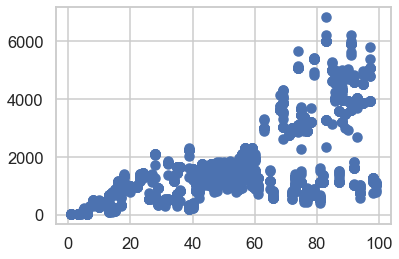

In [405]:
# Independent variable.
X = df["Spending Score"]

# Dependent variable.
y = df["Loyalty Points"] 

# Check for linearity.
plt.scatter(X,y)

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = df).fit()

# View the output.
test.summary()

### What does the summary indicates?

* 𝑅2
 : 45.2% of the total variability of `y` (loyalty points), is explained by the variability of `X` (Spending Score).
* F-stat: If the probability of F stat. is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant, else, the regression is not good. For simple regression model, the `t`-statistic is equivalent.
* `X`: The coefficient of X describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 unit. In this activity, if the length that the customer has been a member (`X`) changes by 1 unit (please check units used) the money spent (`y`) will change by 33.0617 units.
* The `t`-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is 0.102, thus the estimated slope is significant.
* The last two numbers describe the 95% confidence interval of the true xcoefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (31.464, 34.659).

In [406]:
# Extract the estimated parameters.
 

# Extract the standard errors.
  

# Extract the predicted values.


In [407]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 33.0617.
# Constant coef: -75.0527.
# Create the linear equation.
y_pred = -75.0527 + 33.0617 * X

# View the output.
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
2347          NaN
2348          NaN
2349          NaN
2350          NaN
2351          NaN
Name: Spending Score, Length: 2352, dtype: float64

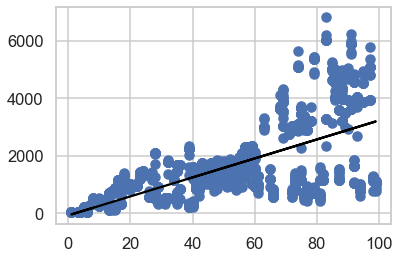

In [408]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.43e-209
Time:                        19:37:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

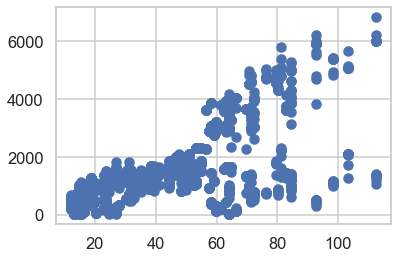

In [409]:
# Independent variable.
X = df["Renumeration"]

# Dependent variable.
y = df["Loyalty Points"] 

# Check for linearity.
plt.scatter(X,y)

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = df).fit()

# View the output.
test.summary()

In [410]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [411]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.1878.
# Constant coef: -65.6865.
# Create the linear equation.
y_pred = -65.6865 + 34.1878 * X

# View the output.
y_pred

# View the output.

0       354.823440
1       354.823440
2       382.857436
3       382.857436
4       410.891432
           ...    
2347           NaN
2348           NaN
2349           NaN
2350           NaN
2351           NaN
Name: Renumeration, Length: 2352, dtype: float64

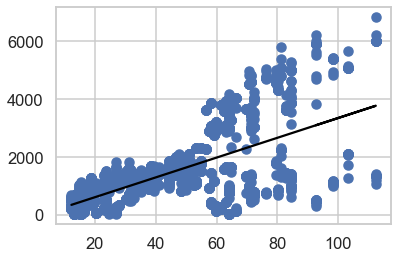

In [412]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0577
Time:                        19:37:47   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

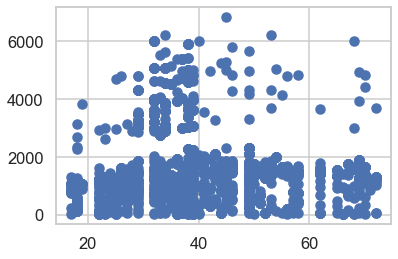

In [413]:
# Independent variable.
X = df["Age"]

# Dependent variable.
y = df["Loyalty Points"] 

# Check for linearity.
plt.scatter(X,y)

# OLS model and summary.
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = df).fit()

# View the output.
test.summary()

In [414]:
# Extract the estimated parameters.


# Extract the standard errors.


# Extract the predicted values.


In [415]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -4.0128.
# Constant coef: 1736.5177.
# Create the linear equation.
y_pred = 1736.5177 - 4.0128 * X

# View the output.
y_pred

# View the output.

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
2347          NaN
2348          NaN
2349          NaN
2350          NaN
2351          NaN
Name: Age, Length: 2352, dtype: float64

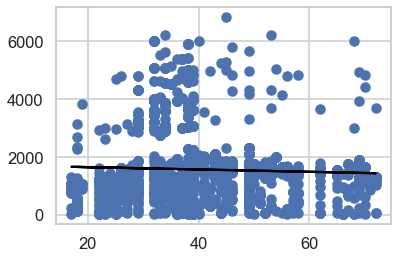

In [416]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

## 6. Observations and insights

***Your observations here...***






Higher the remuneration; higher the spending score and hence higher the loyalty points accumulated:
A.	Average age: 39 years; remuneration: 48.07k£; spending score: 50; loyalty points: 1578
B.	Min age: 17 yrs; remuneration: 12.3k£; spending score: 1; loyalty points: 25
C.	Max age: 72 yrs; remuneration: 63.96k£; spending score: 73; loyalty points: 1751.25
D.	Total sum of loyalty points: 3156064
E.	The maximum value of Loyalty Points = 6847
F.	The maximum value of Loyalty Points = 6847
G.	Interquartile range of Loyalty Points = 979.25

Spending v/s Loyalty (Linear regression): Higher the Spending score -> Higher the Loyalty Points

Remuneration v/s Loyalty (Linear regression): Higher the Remuneration -> Higher the Loyalty Points

Age v/s Loyalty (Linear Regression): constant (not much of a difference)

# 

# 2. Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [417]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [418]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_sales.csv')


# View DataFrame.
print(df2.shape)
print(df2.dtypes)
print(df2.columns)
df2.head()
print(df2.info())
df2.describe()

(2352, 12)
Age                    float64
Renumeration           float64
Spending Score         float64
Loyalty Points         float64
product                float64
Ranking                float64
Product                float64
Platform                object
Year                   float64
North America Sales    float64
European Sales         float64
Global Sales           float64
dtype: object
Index(['Age', 'Renumeration', 'Spending Score', 'Loyalty Points', 'product',
       'Ranking', 'Product', 'Platform', 'Year', 'North America Sales',
       'European Sales', 'Global Sales'],
      dtype='object')


,Age,Renumeration,Spending Score,Loyalty Points,product,Ranking,Product,Platform,Year,North America Sales,European Sales,Global Sales
0,18.0,12.30,39.0,210.0,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.0,12.30,81.0,524.0,466.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.0,13.12,6.0,40.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,13.12,77.0,562.0,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33.0,13.94,40.0,366.0,291.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   float64
 1   Renumeration         2000 non-null   float64
 2   Spending Score       2000 non-null   float64
 3   Loyalty Points       2000 non-null   float64
 4   product              2000 non-null   float64
 5   Ranking              352 non-null    float64
 6   Product              352 non-null    float64
 7   Platform             352 non-null    object 
 8   Year                 352 non-null    float64
 9   North America Sales  352 non-null    float64
 10  European Sales       352 non-null    float64
 11  Global Sales         352 non-null    float64
dtypes: float64(11), object(1)
memory usage: 220.6+ KB
None


,Age,Renumeration,Spending Score,Loyalty Points,product,Ranking,Product,Year,North America Sales,European Sales,Global Sales
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500,1428.017045,3607.227273,1995.582386,2.515966,1.643778,5.334688
std,13.573212,23.123984,26.094702,1283.239705,3148.938839,2743.580936,2360.239834,151.216469,3.409479,2.025752,6.264962
min,17.000000,12.300000,1.000000,25.000000,107.000000,1.000000,107.000000,0.000000,0.000000,0.000000,0.010000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000,88.750000,1945.000000,2003.000000,0.477500,0.390000,1.115000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000,176.500000,3340.000000,2009.000000,1.820000,1.170000,4.320000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000,1439.750000,5435.750000,2012.000000,3.125000,2.160000,6.435000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000,16096.000000,9080.000000,2016.000000,34.020000,23.800000,67.850000


In [419]:
# Drop unnecessary columns.
df2_renum_spend = df2.drop(columns=['product', 'Ranking', 'Product', 'Year', 'North America Sales', 
                                    'European Sales', 'Global Sales', 'Platform'])

# View DataFrame.
print(df2_renum_spend.columns)
df2_renum_spend.describe()

Index(['Age', 'Renumeration', 'Spending Score', 'Loyalty Points'], dtype='object')


,Age,Renumeration,Spending Score,Loyalty Points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


In [420]:
# Explore the data.
df2_renum_spend.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2000 non-null   float64
 1   Renumeration    2000 non-null   float64
 2   Spending Score  2000 non-null   float64
 3   Loyalty Points  2000 non-null   float64
dtypes: float64(4)
memory usage: 73.6 KB


In [421]:
# Descriptive statistics.
print(df2_renum_spend.shape)
df2_renum_spend.describe()

(2352, 4)


,Age,Renumeration,Spending Score,Loyalty Points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


In [422]:
# remove all infinite values

df2_renum_spend.replace([np.inf, -np.inf], np.nan, inplace=True)

df2_renum_spend = df2_renum_spend.replace([np.inf, -np.inf], np.nan)
df2_renum_spend = df2_renum_spend.dropna()
df2_renum_spend = df2_renum_spend.reset_index()
df2_renum_spend.fillna(-99999, inplace=True)

df2_renum_spend.head()
print(df2_renum_spend.info())

,index,Age,Renumeration,Spending Score,Loyalty Points
0,0,18.0,12.30,39.0,210.0
1,1,23.0,12.30,81.0,524.0
2,2,22.0,13.12,6.0,40.0
3,3,25.0,13.12,77.0,562.0
4,4,33.0,13.94,40.0,366.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           2000 non-null   int64  
 1   Age             2000 non-null   float64
 2   Renumeration    2000 non-null   float64
 3   Spending Score  2000 non-null   float64
 4   Loyalty Points  2000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.2 KB
None


In [473]:
# Descriptive statistics.
print(df2_renum_spend.shape)
df2_renum_spend.describe()

(2000, 5)


,index,Age,Renumeration,Spending Score,Loyalty Points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000
std,577.494589,13.573212,23.123984,26.094702,1283.239705
min,0.000000,17.000000,12.300000,1.000000,25.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000


## 2. Plot

<AxesSubplot:xlabel='Renumeration', ylabel='Spending Score'>

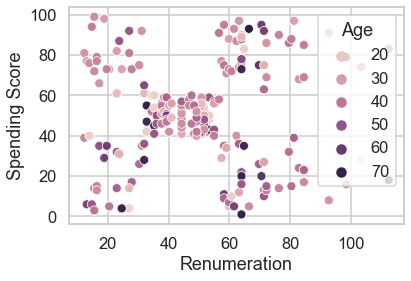

In [423]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='Renumeration',
                y='Spending Score',
                data=df2_renum_spend,
                hue='Age')

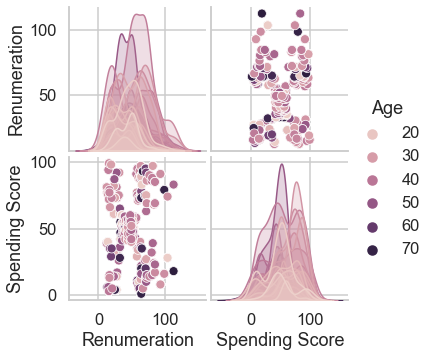

In [424]:
# Create a pairplot with Seaborn.
x = df2_renum_spend[['Renumeration', 'Spending Score']]

sns.pairplot(df2_renum_spend,
             vars=x,
             hue='Age',
             diag_kind='kde')


## 3. Elbow and silhoutte methods

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SS distance')

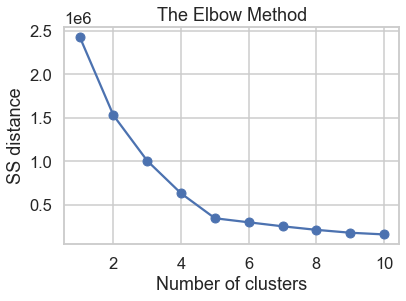

In [425]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

Text(0.5, 1.0, 'The Silhouette Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Sil')

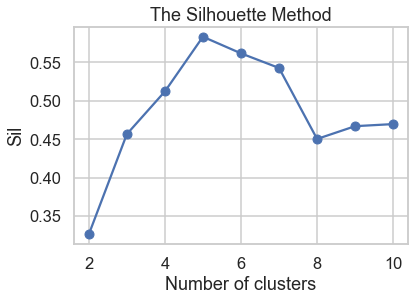

In [426]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

### As we have 6 age groups, let's set `k=6` (six clusters).

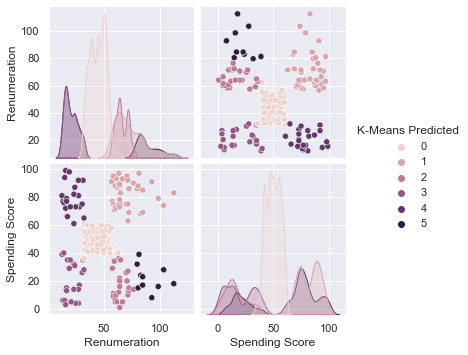

In [467]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [428]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

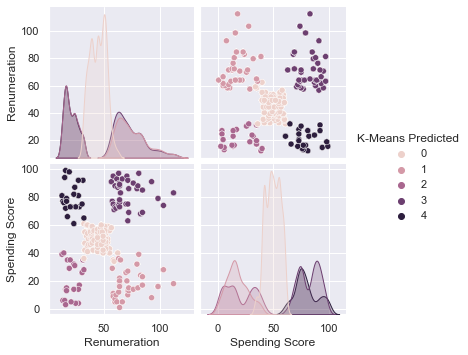

In [479]:
# Apply the final model.
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [480]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
1    330
2    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [484]:
# Visualising the clusters.
# View the K-Means predicted.
print(x.head())

# View the DataFrame.

x.describe()

   Renumeration  Spending Score  K-Means Predicted
0         12.30            39.0                  2
1         12.30            81.0                  4
2         13.12             6.0                  2
3         13.12            77.0                  4
4         13.94            40.0                  2


,Renumeration,Spending Score,K-Means Predicted
count,2000.000000,2000.000000,2000.000000
mean,48.079060,50.000000,1.508000
std,23.123984,26.094702,1.479199
min,12.300000,1.000000,0.000000
25%,30.340000,32.000000,0.000000
50%,47.150000,50.000000,1.000000
75%,63.960000,73.000000,3.000000
max,112.340000,99.000000,4.000000


<AxesSubplot:xlabel='Renumeration', ylabel='Spending Score'>

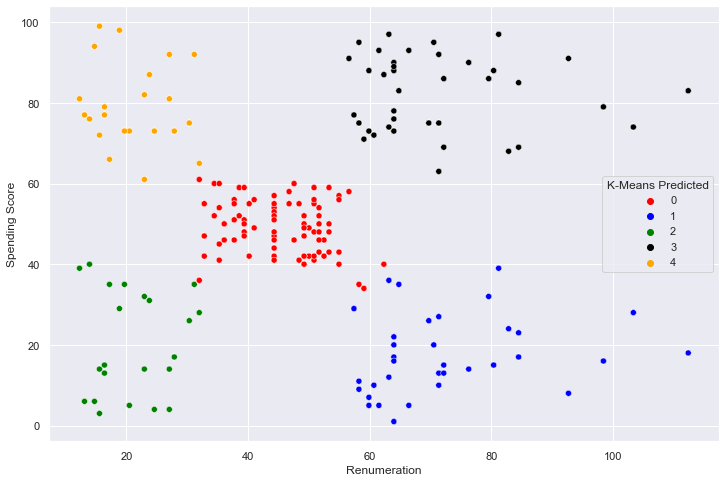

In [482]:
# Visualising the clusters.
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='Renumeration' , 
                y ='Spending Score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'blue', 'green', 'black', 'orange'])


## 7. Discuss: Insights and observations

***Your observations here...***

* To identify the proper clustering of the age group and how relevant remuneration and spending scores are in deriving the target market segments is the key objective of this exercise:
* Per the analysis, was able to identify the customer base as per the age, remuneration and spending scores as the key attributes to focus
    * the average age group is 39; average remuneration is 48 k£; average spending score is 50
    * the min age group is 17; min remuneration is 12.3 k£; min spending score is 1
    * the max age group is 72; max remuneration is 112.34 k£; max spending score is 99
* Normal scatterplot derived 6-age groups: 20, 30, 40, 50, 60 and 70 years
* Pair plot generated the combination of spending score + remuneration; remuneration + age; age + spending score and spending score + remuneration + age as 4 categories which needs to be further analysed to derive proper clustering
* K-means clustering was carried out in deriving number of optimal clusters: 
    * Elbow method: 5 clusters (WSS value started to diminish)
    * Silhouette method: 5 cluster ranges (averages intra-cluster distance) as the peak in the plot
    * After evaluating as per the scatter plot grouping of 6 clusters; the spending scores were skewed at an average age group is 39; average remuneration is 48 k£; average spending score is 50 which was the same.

#### VALUE COUNTS: Clusters to target!
* Cluster 0    count: 774
* Cluster 3    count: 356
* Cluster 1    count: 330
* Cluster 2    count: 271
* Cluster 4    count: 269


# 

# 3. NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [433]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [434]:
# Load the data set as df3.
df3 = turtle_reviews

# View DataFrame.
df3.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [435]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [436]:
# Keep necessary columns. Drop unnecessary columns.
# Drop unnecessary columns.
df3 = turtle_reviews.drop(columns=['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points',
                                  'education', 'language', 'platform', 'product'])

# Display a summary of the numeric variables and column names.
print(df3.columns)
df3.describe()

# View DataFrame.
print(df3.shape)
print(df3.dtypes)
df3.head()
print(df3.info())

Index(['review', 'summary'], dtype='object')


,review,summary
count,2000,2000
unique,1980,1432
top,love it,Five Stars
freq,5,378


(2000, 2)
review     object
summary    object
dtype: object


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [437]:
# Determine if there are any missing values.

# Any missing values?
# Replace the missing values with 0.
df3.fillna(0, inplace=True)

# Determine the number of missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [438]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [439]:
# Summary: Change all to lower case and join with a space.
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [440]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [441]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [442]:
# Drop duplicates in both columns.

# Check the number of duplicate values in the review column.
df3.review.duplicated().sum()
# Drop duplicates.
survey = df3.drop_duplicates(subset=['review'])

# Check the number of duplicate values in the summary column.
df3.summary.duplicated().sum()
# Drop duplicates.
survey = df3.drop_duplicates(subset=['summary'])

# Preview data.
survey.reset_index(inplace=True)
survey.head()

50

649

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [443]:
# Create new DataFrame (copy DataFrame).
new_df3 = survey[['review','summary']].copy()

# View DataFrame.
new_df3.info()
print(new_df3)
new_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1351 non-null   object
 1   summary  1351 non-null   object
dtypes: object(2)
memory usage: 21.2+ KB
                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1346  this is a fun card game for people who like wo...   
1347  fun for the family just make certain you agree...   
1348  great game to keep the mind active we play it ...   
1349  we are retired and find this a great way to st...   
1350  the perfect word game for mixed ages with mom ... 

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [444]:
# Apply tokenisation to both columns.
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

new_df3['tokens_review'] = new_df3['review'].apply(word_tokenize)
new_df3['tokens_summary'] = new_df3['summary'].apply(word_tokenize)

# Preview data.
new_df3['review'].head()
new_df3['summary'].head()

# View DataFrame.
new_df3.columns
new_df3.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

Index(['review', 'summary', 'tokens_review', 'tokens_summary'], dtype='object')

,review,summary,tokens_review,tokens_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [445]:
# String all the review together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(new_df3.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + new_df3['review'][i]

# You might need to install WordCloud.
!pip install WordCloud

# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

# Review: Create a word cloud.
review_wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_reviews) 



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

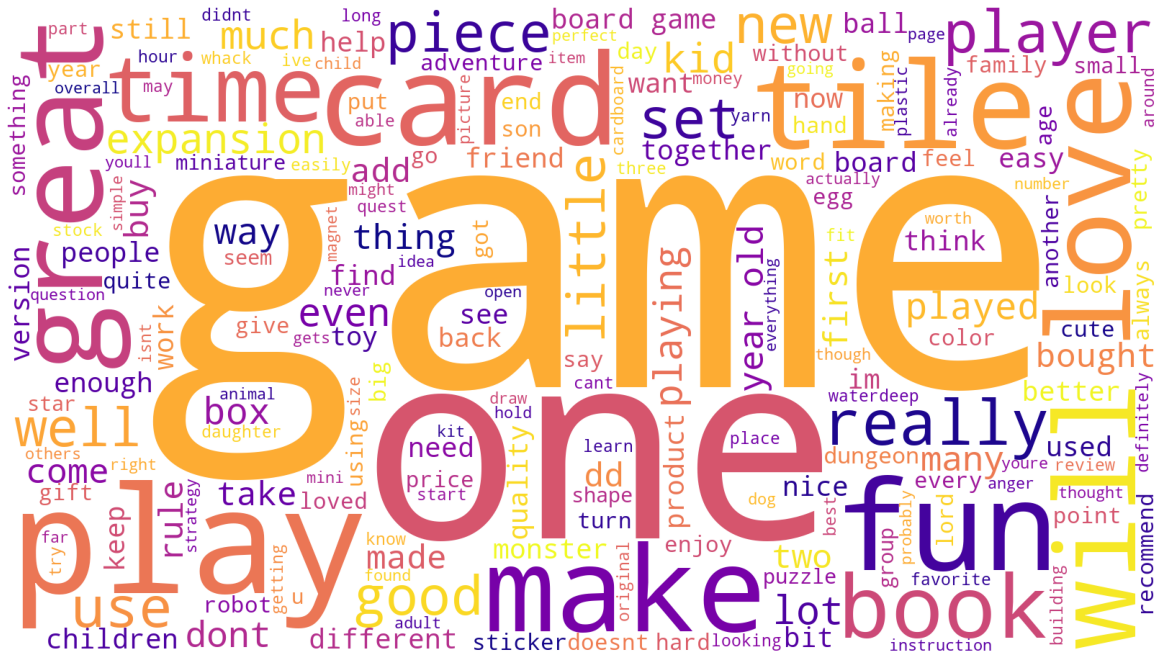

In [446]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [447]:
# String all the summary together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(new_df3.shape[0]):
    # Add each comment.
    all_summary = all_summary + new_df3['summary'][i]


# Summary: Create a word cloud.
summary_wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_summary) 

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

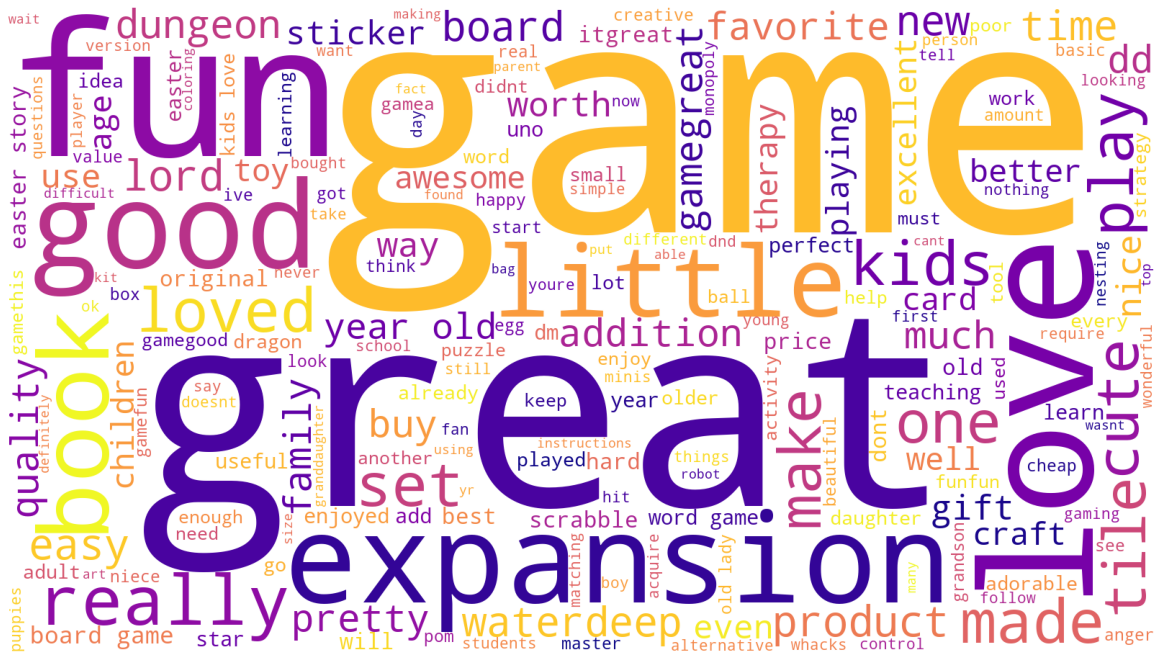

In [448]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [449]:
# Define an empty list of tokens.
all_reviews = []

for i in range(new_df3.shape[0]):
    # Add each token to the list.
    all_reviews = all_reviews + new_df3['tokens_review'][i]
    
# Determine the frequency distribution of reviews.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution of reviews.
fdist_review = FreqDist(all_reviews)

# Preview data.
fdist_review

FreqDist({'the': 5021, 'and': 2934, 'to': 2843, 'a': 2830, 'of': 2262, 'i': 1888, 'it': 1830, 'is': 1594, 'this': 1551, 'for': 1361, ...})

In [450]:
# Determine the frequency distribution of summary.
# Define an empty list of tokens.
all_summary = []

for i in range(new_df3.shape[0]):
    # Add each token to the list.
    all_summary = all_summary + new_df3['tokens_summary'][i]
    
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution of summary.
fdist_summary = FreqDist(all_summary)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [451]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_reviews = [word for word in all_reviews if word.isalnum()]

tokens_summaries = [word for word in all_summary if word.isalnum()]

In [452]:
# Remove all the stopwords in reviews

# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_reviews2 = [x for x in tokens_reviews if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_reviews2_string = ''

for value in tokens_reviews2:
    # Add each filtered token word to the string.
    tokens_reviews2_string = tokens_reviews2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [453]:
# Remove all the stopwords in summary
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_summaries2 = [x for x in tokens_summaries if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_summaries2_string = ''

for value in tokens_summaries2:
    # Add each filtered token word to the string.
    tokens_summaries2_string = tokens_summaries2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 4c) Create wordcloud without stopwords

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

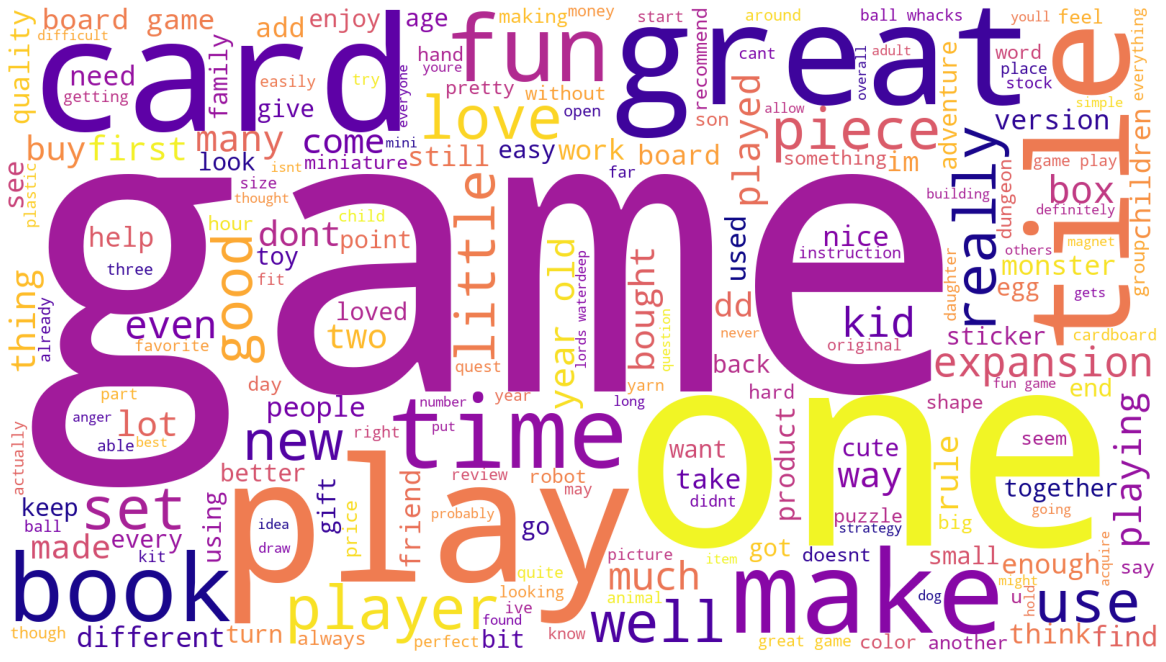

In [454]:
# Create a WordCloud of reviews.
wordcloud_reviews = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_reviews2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_reviews) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

<Figure size 1152x648 with 0 Axes>

(-0.5, 1599.5, 899.5, -0.5)

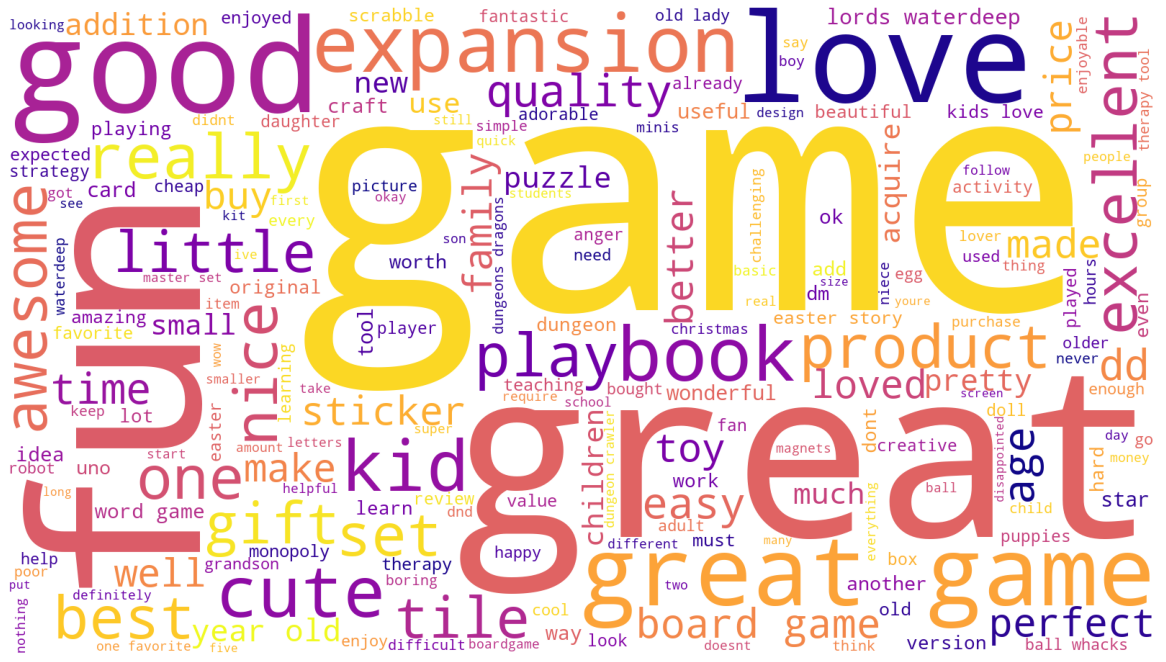

In [455]:
# Create a WordCloud of summaries.
wordcloud_summaries = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summaries2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summaries) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly to the one provided.

### 4d) Identify 15 most common words and polarity

In [456]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist_summaries1 = FreqDist(tokens_summaries2)
fdist_reviews1 = FreqDist(tokens_reviews2)

# Preview the data.
print('Summary Frequency Distribution data... ')
fdist_summaries1

print('Reviews Frequency Distribution data... ')
fdist_reviews1

Summary Frequency Distribution data... 


FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

Reviews Frequency Distribution data... 


FreqDist({'game': 1360, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [457]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens_reviews2).most_common(15),
                      columns=['Word_Review', 'Frequency']).set_index('Word_Review')

# Preview data.
counts_review

,Frequency
Word_Review,
game,1360
one,475
play,442
fun,407
great,392
like,373
get,293
cards,281
tiles,280


Text(0.5, 0, 'Count')

Text(0, 0.5, 'Word_Review')

Text(0.5, 1.0, 'Review responses: Count of the 15 most frequent words')

Text(1360.41, -0.15, '1360')

Text(475.41, 0.85, '475')

Text(442.41, 1.85, '442')

Text(407.41, 2.85, '407')

Text(392.41, 3.85, '392')

Text(373.41, 4.85, '373')

Text(293.41, 5.85, '293')

Text(281.41, 6.85, '281')

Text(280.41, 7.85, '280')

Text(278.41, 8.85, '278')

Text(259.41, 9.85, '259')

Text(252.41, 10.85, '252')

Text(246.41, 11.85, '246')

Text(244.41, 12.85, '244')

Text(237.41, 13.85, '237')

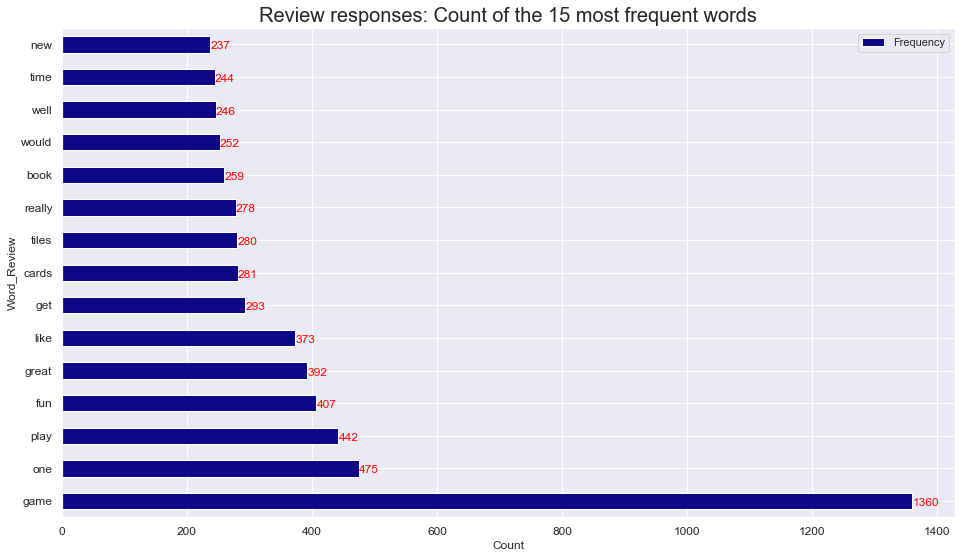

In [458]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word_Review', fontsize=12)
ax.set_title("Review responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [459]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens_summaries2).most_common(15),
                      columns=['Word_Summary', 'Frequency']).set_index('Word_Summary')

# Preview data.
counts_summary

,Frequency
Word_Summary,
game,268
great,237
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


Text(0.5, 0, 'Count')

Text(0, 0.5, 'Word_Summary')

Text(0.5, 1.0, 'Summary responses: Count of the 15 most frequent words')

Text(268.41, -0.15, '268')

Text(237.41, 0.85, '237')

Text(175.41, 1.85, '175')

Text(84.41, 2.85, '84')

Text(70.41, 3.85, '70')

Text(54.41, 4.85, '54')

Text(48.41, 5.85, '48')

Text(42.41, 6.85, '42')

Text(42.41, 7.85, '42')

Text(40.41, 8.85, '40')

Text(34.41, 9.85, '34')

Text(30.41, 10.85, '30')

Text(30.41, 11.85, '30')

Text(28.41, 12.85, '28')

Text(28.41, 13.85, '28')

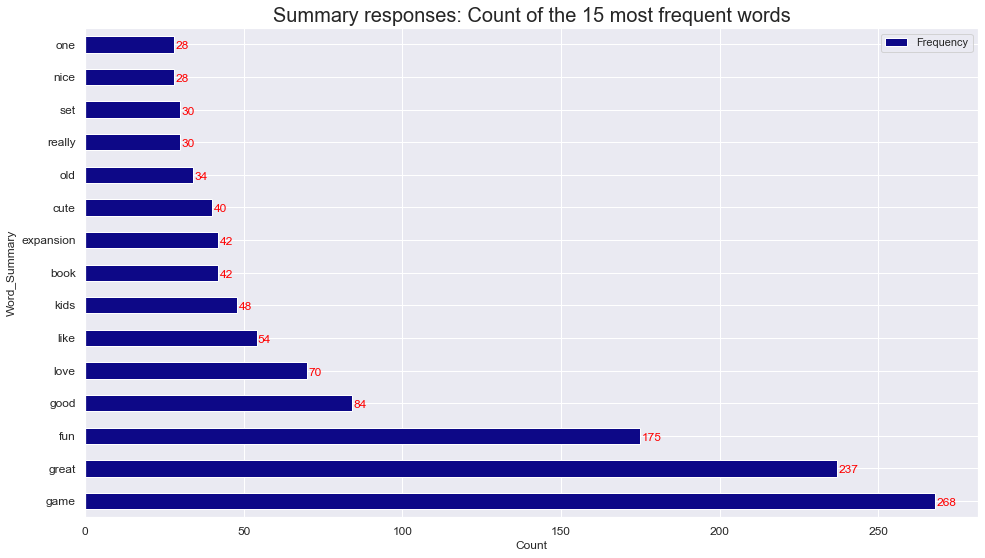

In [460]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word_Summary', fontsize=12)
ax.set_title("Summary responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [461]:
# Import the necessary package
from textblob import TextBlob

# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [462]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
new_df3['polarity_review'] = new_df3['review'].apply(generate_polarity)
new_df3['polarity_summary'] = new_df3['summary'].apply(generate_polarity)

# Preview the result.
# View output.
new_df3['polarity_review'].head()
new_df3['polarity_summary'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [463]:
# Define a function to extract a subjectivity score for the reviews and summary.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each reviews.
new_df3['subjectivity_review']  = new_df3['review'].apply(generate_subjectivity)

# Preview the result.
new_df3['subjectivity_review'].head()

# Populate a new column with subjectivity scores for each summary.
new_df3['subjectivity_summary']  = new_df3['summary'].apply(generate_subjectivity)

# Preview the result.
new_df3['subjectivity_summary'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

In [464]:
new_df3["row_id"] = new_df3.index + 1
#print first 10 rows 
print (new_df3.head(10))

#create a new data frame with "id" and "comment" fields
df_subset = new_df3[['row_id', 'review']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['Review'] = df_subset['review'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['Review'] = df_subset['review'].str.casefold()
print (df_subset.head(10))

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   
5  i have bought many gm screens over the years b...   
6  could be better but its still great i love the...   
7  my review will mirror others in that this kind...   
8                                cant wait to use it   
9  this is a campaign specific dm screen meant to...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   
5                                best gm screen

Processing sentiment analysis...
                                              row_id sentiment_type  \
0  when it comes to a dms screen the space on the...       compound   
0  an open letter to galeforce9 your unpainted mi...       compound   
0  nice art nice printing why two panels are fill...       compound   
0  amazing buy bought it as a gift for our new dm...       compound   
0  as my review of gf9s previous screens these we...       compound   
0  i have bought many gm screens over the years b...       compound   
0  could be better but its still great i love the...       compound   
0  my review will mirror others in that this kind...       compound   
0                                cant wait to use it       compound   
0  this is a campaign specific dm screen meant to...       compound   

   sentiment_score  
0          -0.0711  
0          -0.4404  
0           0.4019  
0           0.0000  
0          -0.3182  
0           0.6369  
0           0.7506  
0          -0.111

,sentiment_score
count,1351.000000
mean,0.385885
std,0.347644
min,-0.905200
25%,0.000000
50%,0.510600
75%,0.624900
max,0.952400


<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='Compound', ylabel='Mean Sentiment Score'>

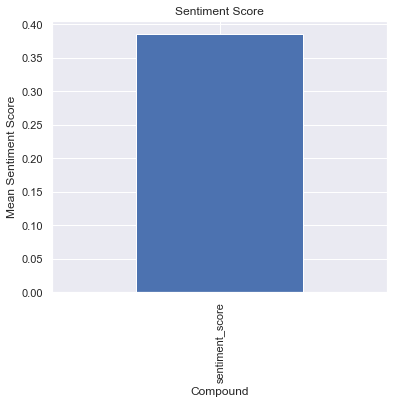

In [497]:
# set up empty dataframe for staging output
sentiment_df=pd.DataFrame()
sentiment_df['row_id']=['99999999999']
sentiment_df['sentiment_type']='NA999NA'
sentiment_df['sentiment_score']=0

print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = sentiment_df
for index, row in new_df3.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        sentiment_df['row_id']=row[0]
        sentiment_df['sentiment_type']=key
        sentiment_df['sentiment_score']=value
        t_df=t_df.append(sentiment_df)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))


#merge dataframes
df_output = pd.concat([new_df3, t_df_cleaned])
print(df_output.head(10))

# Visualize sentiment analysis output
df_output[["sentiment_score"]].describe()

#generate mean of sentiment_score by period
dfg = df_output[['sentiment_score']].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Compound', figsize=(6, 5))

In [521]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

fin_data = pd.DataFrame(new_df3[['review', 'summary']])
fin_data['Polarity'] = fin_data['summary'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
    
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    fin_data['Vader Sentiment'] = fin_data['summary'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
#fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,review,summary,Polarity,Analysis
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,0.15,Positive
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,-0.80,Negative
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.00,Neutral
3,amazing buy bought it as a gift for our new dm...,five stars,0.00,Neutral
4,as my review of gf9s previous screens these we...,money trap,0.00,Neutral


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'TextBlob results')

([<matplotlib.patches.Wedge at 0x299711b2910>,
 [Text(-0.5705442001181653, 0.9404676048176902, 'Positive'),
  Text(0.1694244952851154, -1.0868741143285106, 'Neutral'),
  Text(1.2482858965853443, -0.5140839623895337, 'Negative')],
 [Text(-0.31120592733718105, 0.5129823299005583, '67.4%'),
  Text(0.09241336106460839, -0.5928404259973693, '20.2%'),
  Text(0.7859577867389204, -0.3236824948378545, '12.4%')])

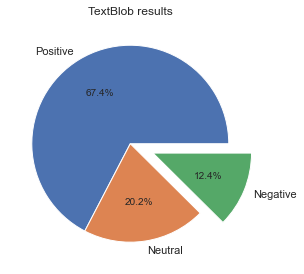

In [523]:
tb_counts = fin_data.Analysis.value_counts()

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Histogram of sentiment score polarity of Reviews')

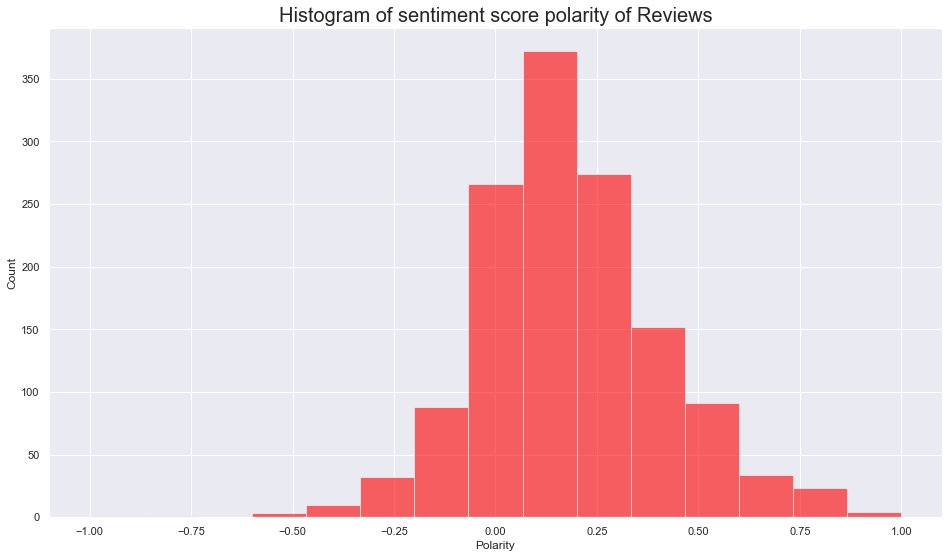

In [485]:
# Review: Create a histogram plot with bins = 15 for Review.

# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(new_df3['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of Reviews', fontsize=20)

plt.show()

# Histogram of sentiment score


<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Polarity')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Histogram of sentiment score polarity of Summaries')

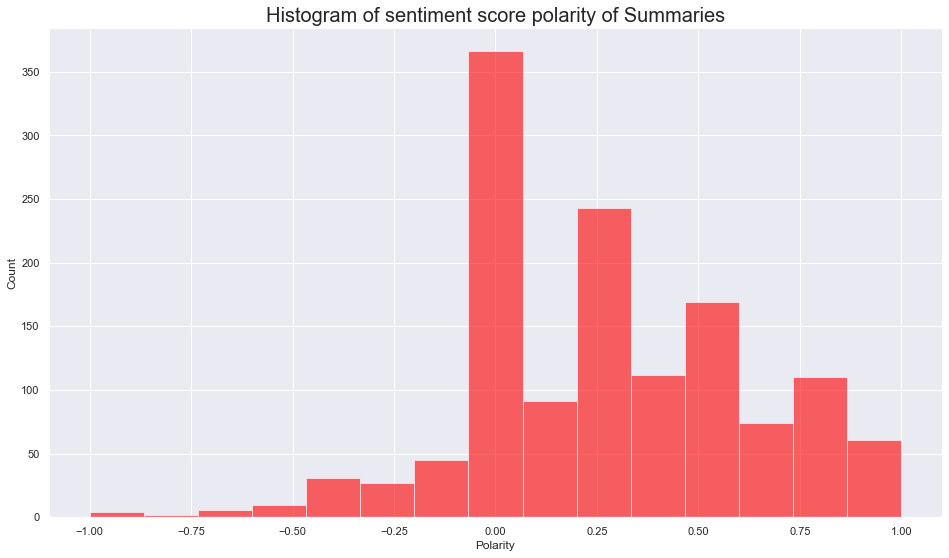

In [486]:
# Summary: Create a histogram plot with bins = 15 for Summary.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(new_df3['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of Summaries', fontsize=20)

plt.show()

# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

### Extract Negative Reviews

In [506]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_reviews = new_df3.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'tokens_review', 'polarity_review', 'subjectivity_review']]

# Eliminate unnecessary columns.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,tokens_review,polarity_review,subjectivity_review
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,"['booo', 'unles', 'you', 'are', 'patient', 'know', 'how', 'to', 'measure', 'i', 'didnt', 'have', 'the', 'patience', 'neither', 'did', 'my', 'daughter', 'boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am', 'not']",-1.000000,1.000000
147,incomplete kit very disappointing,"['incomplete', 'kit', 'very', 'disappointing']",-0.780000,0.910000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,"['one', 'of', 'my', 'staff', 'will', 'be', 'using', 'this', 'game', 'soon', 'so', 'i', 'dont', 'know', 'how', 'well', 'it', 'works', 'as', 'yet', 'but', 'after', 'looking', 'at', 'the', 'cards', 'i', 'believe', 'it', 'will', 'be', 'helpful', 'in', 'getting', 'a', 'conversation', 'started', 'regarding', 'anger', 'and', 'what', 'to', 'do', 'to', 'control', 'it']",-0.550000,0.300000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,"['i', 'bought', 'this', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'grandson', 'its', 'a', 'sticker', 'book', 'so', 'how', 'can', 'i', 'go', 'wrong', 'with', 'this', 'gift']",-0.500000,0.900000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,"['i', 'sent', 'this', 'product', 'to', 'my', 'granddaughter', 'the', 'pompom', 'maker', 'comes', 'in', 'two', 'parts', 'and', 'is', 'supposed', 'to', 'snap', 'together', 'to', 'create', 'the', 'pompoms', 'however', 'both', 'parts', 'were', 'the', 'same', 'making', 'it', 'unusable', 'if', 'you', 'cant', 'make', 'the', 'pompoms', 'the', 'kit', 'is', 'useless', 'since', 'this', 'was', 'sent', 'as', 'a', 'gift', 'i', 'do', 'not', 'have', 'it', 'to', 'return', 'very', 'disappointed']",-0.491667,0.433333
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,"['my', '8', 'yearold', 'granddaughter', 'and', 'i', 'were', 'very', 'frustrated', 'and', 'discouraged', 'attempting', 'this', 'craft', 'it', 'is', 'definitely', 'not', 'for', 'a', 'young', 'child', 'i', 'too', 'had', 'difficulty', 'understanding', 'the', 'directions', 'we', 'were', 'very', 'disappointed']",-0.446250,0.533750
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,"['i', 'purchased', 'this', 'on', 'the', 'recommendation', 'of', 'two', 'therapists', 'working', 'with', 'my', 'adopted', 'children', 'the', 'children', 'found', 'it', 'boring', 'and', 'put', 'it', 'down', 'half', 'way', 'through']",-0.440741,0.485185
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,"['this', 'game', 'although', 'it', 'appears', 'to', 'be', 'like', 'uno', 'and', 'have', 'an', 'easier', 'play', 'method', 'it', 'was', 'still', 'too', 'time', 'consuming', 'and', 'wordy', 'for', 'my', 'children', 'with', 'learning', 'disabilities']",-0.400000,0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,"['my', 'son', 'loves', 'playing', 'this', 'game', 'it', 'was', 'recommended', 'by', 'a', 'counselor', 'at', 'school', 'that', 'works', 'with', 'him']",-0.400000,0.400000
714,if you like me used to play dd but n

### Extract Negative Summaries

In [507]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summaries = new_df3.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summaries = negative_sentiment_summaries[['summary', 'tokens_summary', 'polarity_summary', 'subjectivity_summary']]

# Eliminate unnecessary columns.
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,tokens_summary,polarity_summary,subjectivity_summary
17,the worst value ive ever seen,"['the', 'worst', 'value', 'ive', 'ever', 'seen']",-1.000000,1.000000
165,boring unless you are a craft person which i am,"['boring', 'unless', 'you', 'are', 'a', 'craft', 'person', 'which', 'i', 'am']",-1.000000,1.000000
588,boring,['boring'],-1.000000,1.000000
838,before this i hated running any rpg campaign dealing with towns because it,"['before', 'this', 'i', 'hated', 'running', 'any', 'rpg', 'campaign', 'dealing', 'with', 'towns', 'because', 'it']",-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,"['another', 'worthless', 'dungeon', 'masters', 'screen', 'from', 'galeforce9']",-0.800000,0.900000
116,disappointed,['disappointed'],-0.750000,0.750000
266,promotes anger instead of teaching calming methods,"['promotes', 'anger', 'instead', 'of', 'teaching', 'calming', 'methods']",-0.700000,0.200000
635,too bad this is not what i was expecting,"['too', 'bad', 'this', 'is', 'not', 'what', 'i', 'was', 'expecting']",-0.700000,0.666667
638,bad qualityall made of paper,"['bad', 'qualityall', 'made', 'of', 'paper']",-0.700000,0.666667
144,at age 31 i found these very difficult to make,"['at', 'age', '31', 'i', 'found', 'these', 'very', 'difficult', 'to', 'make']",-0.650000,1.000000


### Extract Positive Reviews

In [508]:
# Top 20 positive reviews.
# Create a Sentiment Reviews DataFrame.
positive_sentiment_reviews = new_df3.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_reviews = positive_sentiment[['review', 'tokens_review', 'polarity_review', 'subjectivity_review']]
# Adjust the column width.
positive_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,tokens_review,polarity_review,subjectivity_review
564,perfect,['perfect'],1.000000,1.000000
1082,my daughter loves her stickers awesome seller thank you,"['my', 'daughter', 'loves', 'her', 'stickers', 'awesome', 'seller', 'thank', 'you']",1.000000,1.000000
1336,perfect for tutoring my grandson in spelling,"['perfect', 'for', 'tutoring', 'my', 'grandson', 'in', 'spelling']",1.000000,1.000000
891,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,"['the', 'best', 'part', 'i', 'see', 'is', 'the', 'box', 'what', 'a', 'wonderfully', 'diverse', 'and', 'rounded', 'set', 'for', 'the', 'cost', 'i', 'am', 'so', 'happy', 'and', 'as', 'the', 'dm', 'you', 'know', 'that', 'if', 'i', 'am', 'happy', 'my', 'players', 'are', 'happy']",0.880000,0.860000
498,great quality very cute and perfect for my toddler,"['great', 'quality', 'very', 'cute', 'and', 'perfect', 'for', 'my', 'toddler']",0.816667,0.916667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,"['the', 'pictures', 'are', 'great', 'ive', 'done', 'one', 'and', 'gave', 'it', 'to', 'a', 'friend', 'of', 'mine', 'who', 'likes', 'dragons']",0.800000,0.750000
336,great seller happy with my purchase 5 starrrr,"['great', 'seller', 'happy', 'with', 'my', 'purchase', '5', 'starrrr']",0.800000,0.875000
439,great easter gift for kids,"['great', 'easter', 'gift', 'for', 'kids']",0.800000,0.750000
491,these are great,"['these', 'are', 'great']",0.800000,0.750000
575,great,['great'],0.800000,0.750000


### Extract Positive Summary

In [509]:
# Top 20 positive summaries.
# Create a Sentiment Summary DataFrame.
positive_sentiment_summaries = new_df3.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summaries = positive_sentiment[['summary', 'tokens_summary', 'polarity_summary', 'subjectivity_summary']]
# Adjust the column width.
positive_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,tokens_summary,polarity_summary,subjectivity_summary
564,aquire game,"['aquire', 'game']",-0.400000,0.400000
1082,awesome seller thank you,"['awesome', 'seller', 'thank', 'you']",1.000000,1.000000
1336,tutoring,['tutoring'],0.000000,0.000000
891,excellent tile set,"['excellent', 'tile', 'set']",1.000000,1.000000
498,great quality very cute and perfect for my toddler,"['great', 'quality', 'very', 'cute', 'and', 'perfect', 'for', 'my', 'toddler']",0.816667,0.916667
31,the pictures are great ive done one and gave it to a,"['the', 'pictures', 'are', 'great', 'ive', 'done', 'one', 'and', 'gave', 'it', 'to', 'a']",0.800000,0.750000
336,great for kids,"['great', 'for', 'kids']",0.800000,0.750000
439,great easter gift for kids,"['great', 'easter', 'gift', 'for', 'kids']",0.800000,0.750000
491,cute letters,"['cute', 'letters']",0.500000,1.000000
575,great,['great'],0.800000,0.750000


## 7. Discuss: Insights and observations

***Your observations here...***

Summary Frequency Distribution data... 
TOP 15 words: FreqDist({'game': 268, 'great': 237, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

Reviews Frequency Distribution data... 
TOP 15 words: FreqDist({'game': 1360, 'one': 475, 'play': 442, 'fun': 407, 'great': 392, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})


* Polarity and Sentiment analysis:
    * The mean sentiment score is 0.385
    * 75% sentiment score is 0.62
    * Max sentiment score if 0.95

Sentiment Polarity Score of Reviews: Its mostly positive trend
* Polarity lies between -1 and +1 (-1 defines negative sentiment and 1 defines positive sentiment)
* Subjectivity lies between [0, 1]: (0 – objective; 1 – subjective)Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher the subjectivity means that the text contains personal opinion rather than factual information.



The Text Blob pie chart shows 67.4% Positive Polarity Analysis for both Summary & Reviews
20.2% Neutral Polarity Analysis and
12.4% Negative Polarity Analysis

* Extract negative summaries (Top 20)
    * 8 out of 20 had personalized subjectivity scores (>0.5 or >50%)
* Extract negative reviews
    * 18 out of 20 had personalized subjectivity scores (>0.5 or >50%)
* Extract positive summaries
    * 9 out of 10 scores (polarity and subjectivity) were >0.75 to 1 or 75% to 100%
* Extract positive reviews
    * 10 out of 10 scores (polarity and subjectivity) were >0.8 to 1 or 80% to 100%

However, NPS scores are equally important to be derived as there are 20.2% neutral and 12.4% negative (detractors) and need to convert more promoters to improve the marketing strategy!


# 